In [117]:
# Packages to import. 

import pandas as pd 
import numpy as np
import datamapplot
import pandas as pd 

from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

In [118]:
PATH = "C:/Users/jacob/OneDrive - Université Laval/biophilo/Data/pybiblio/SPECIALIZED PHILOSOPHY OF BIOLOGY/"

df_refs =  pd.read_csv(PATH + "REFERENCES_SPECIAL_PHILO_BIO.csv", dtype="str_")
df_refs["count"] = df_refs.groupby("cited_id")["cited_id"].transform("count")
df_refs = df_refs[df_refs["count"] >= 100]
df_refs

,position,cited_id,doi,title,authors,authors_auid,authors_affiliationid,sourcetitle,publicationyear,coverDate,...,first,last,citedbycount,type,text,fulltext,cited_year,cited_title,citing_id,count
22,23,0003721795,NaN,The extended phenotype,"Dawkins, R.",NaN,NaN,THE EXTENDED PHENOTYPE,1989-02-23,NaN,...,NaN,NaN,NaN,NaN,Oxford University Press,R. Dawkins The extended phenotype Oxford Unive...,1982,The extended phenotype,85214130018,115
120,6,0003397032,NaN,Adaptation and environment,"Brandon, R.N.",NaN,NaN,ADAPTATION AND ENVIRONMENT,1990-02-23,NaN,...,NaN,NaN,NaN,NaN,Princeton University Press,Brandon RN (1990) Adaptation and environment. ...,1990,Adaptation and environment,85213705399,117
122,8,0003668973,NaN,On the origin of species by means of natural s...,"Darwin, C.",NaN,NaN,ON THE ORIGIN OF SPECIES BY MEANS OF NATURAL S...,1859-02-23,NaN,...,NaN,NaN,NaN,NaN,"Albemarle Street, John Murray",C. Darwin On the origin of species by means of...,1859,On the origin of species by means of natural s...,85213705399,195
123,9,0003612445,NaN,"The descent of man, and selection in relation ...","Darwin, C.",NaN,NaN,"THE DESCENT OF MAN, AND SELECTION IN RELATION ...",1981-02-23,NaN,...,NaN,NaN,NaN,NaN,Princeton University Press,Darwin C (1981) The descent of man and selecti...,1871,"The descent of man, and selection in relation ...",85213705399,113
124,10,0004149207,NaN,The selfish gene,"Dawkins, R.",NaN,NaN,THE SELFISH GENE,1976-02-23,NaN,...,NaN,NaN,NaN,NaN,Oxford University Press,Dawkins R (1976) The selfish gene. Oxford Univ...,1976,The selfish gene,85213705399,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204834,19,0003867942,NaN,The growth of biological thought,"Mayr, E.",NaN,NaN,THE GROWTH OF BIOLOGICAL THOUGHT,1982-02-23,NaN,...,NaN,NaN,NaN,NaN,"Harvard University Press, Cambridge",NaN,1982,The growth of biological thought,0026291988,167
204877,9,0003804679,NaN,Science as a process: An evolutionary account ...,"Hull, D.L.",NaN,NaN,SCIENCE AS A PROCESS: AN EVOLUTIONARY ACCOUNT ...,1988-02-23,NaN,...,NaN,NaN,NaN,NaN,"University of Chicago Press, Chicago",NaN,1988,Science as a process: An evolutionary account ...,51649154697,115
205079,12,0004245022,NaN,Culture and the evolutionary process,"Boyd, R.; Richerson, P.J.",NaN,NaN,CULTURE AND THE EVOLUTIONARY PROCESS,1985-02-23,NaN,...,NaN,NaN,NaN,NaN,"University of Chicago Press, Chicago",NaN,1985,Culture and the evolutionary process,2342585303,107
205082,15,0004149207,NaN,The selfish gene,"Dawkins, R.",NaN,NaN,THE SELFISH GENE,1976-02-23,NaN,...,NaN,NaN,NaN,NaN,"Oxford University Press, Oxford",NaN,1976,The selfish gene,2342585303,225


In [119]:
df_refs = pd.read_csv(PATH + "refs_by_articles_for_umap.csv", dtype="str_")
df_refs = df_refs.cited_references

In [120]:
docs = df_refs.to_list()
docs

['Cognitive adaptations for social exchange, The modularity of mind, A theory of content',
 'Discovering complexity: Decomposition and localization as strategies in scientific research, The dialectical biologist, Novelty in evolution: Restructuring the concept, Life Itself: A Comprehensive Inquiry Into the Nature, Origin, and Fabrication of Life, Evolving hierarchical systems, Unifying biology: The evolutionary synthesis and evolutionary biology, The nature of selection: Evolutionary theory in philosophical focus, A new evolutionary law, The natural selection of populations and communities',
 'Science as a process: An evolutionary account of the social and conceptual development of science',
 'Cognitive foundations of natural history: Towards an anthropology of science, Wonderful life: The Burgess Shale and the nature of history, Science as a process: An evolutionary account of the social and conceptual development of science, The Great Chain of Being: A Study of the History of an Idea

In [121]:
# Pre-calculate embeddings
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("BAAI/bge-small-en")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

# Pre-reduce embeddings for visualization purposes
reduced_embeddings = UMAP(n_neighbors= 50, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(embeddings)

Batches:   0%|          | 0/102 [00:00<?, ?it/s]

In [124]:
from hdbscan import HDBSCAN
from umap import UMAP
umap_model = UMAP(n_neighbors= 50, n_components=2, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size= 12, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [125]:
# Define a custom list of stopwords (or use an extended one)
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(
  # Sub-models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  #representation_model=representation_model,
  vectorizer_model=vectorizer_model,
  
  # Hyperparameters
  top_n_words=10,
  verbose=True
)

# Train model
topics, probs = topic_model.fit_transform(docs, embeddings)

2025-02-23 20:40:11,141 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-02-23 20:40:23,681 - BERTopic - Dimensionality - Completed ✓
2025-02-23 20:40:23,681 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-02-23 20:40:23,747 - BERTopic - Cluster - Completed ✓
2025-02-23 20:40:23,751 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-02-23 20:40:23,885 - BERTopic - Representation - Completed ✓


In [126]:
topic_model.visualize_heatmap()


In [127]:
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [98]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, reduced_embeddings=reduced_embeddings)
topic_model.topics_ = original_topics

100%|██████████| 60/60 [00:00<00:00, 257.68it/s]


In [133]:
#original_topics = topics.copy()
topic_model.topics_ = original_topics
topic_model.visualize_topics()

In [129]:
topic_model.reduce_topics(docs, nr_topics=20)

2025-02-23 20:43:25,720 - BERTopic - Topic reduction - Reducing number of topics
2025-02-23 20:43:25,866 - BERTopic - Topic reduction - Reduced number of topics from 62 to 20


In [130]:
x = topic_model.get_document_info(docs)

y = x.Name
labels =y.values
labels.shape

topic_info = topic_model.get_topic_info()
excluded_topic = str(topic_info.Name[0]) 
clean_labels= [item.replace(excluded_topic, "Unlabelled") for item in labels] # To exclude -1 topic which is typically noise. 

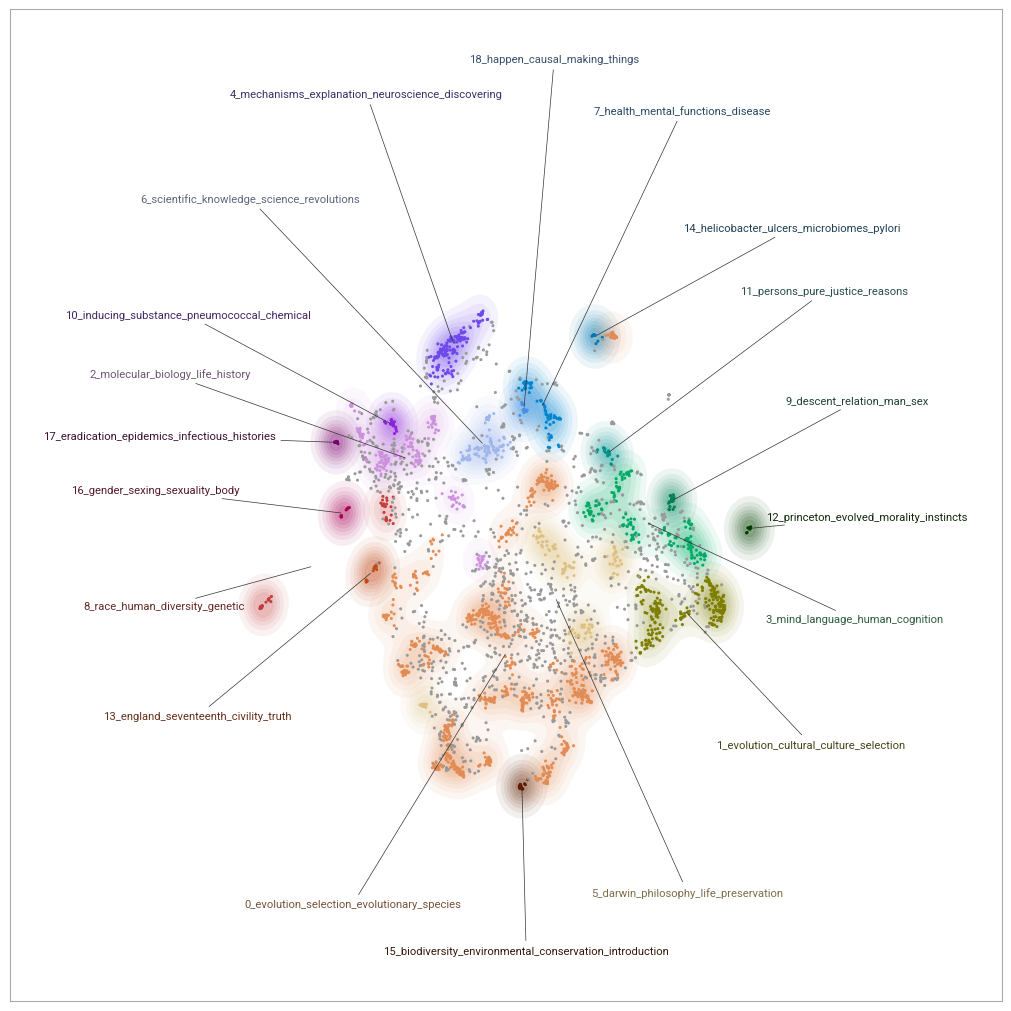

In [131]:
plot = datamapplot.create_plot(
    reduced_embeddings,
    clean_labels,
)

<InteractiveFigure width=100% height=800>
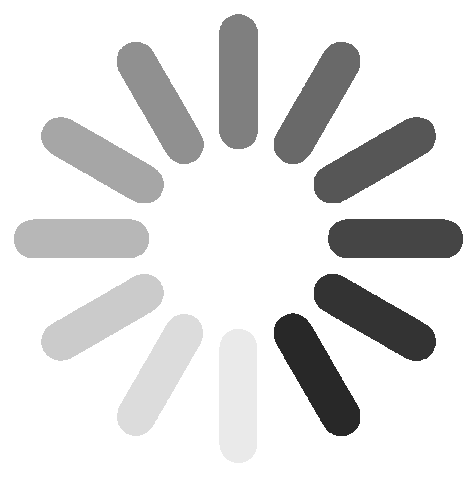

In [102]:
plot = datamapplot.create_interactive_plot(
    reduced_embeddings,
    clean_labels,
    #hover_text = node_text,
    enable_search=True, 
    cluster_boundary_polygons=False,
    cluster_boundary_line_width=8,
    color_label_text=True,
    color_cluster_boundaries=False,
    inline_data=True,
    use_medoids = True,
    #background_color="#303446",
    title = f"Philosophy of Biology",  
    sub_title= f"From <i>Scopus</i>",
    polygon_alpha = 5,
    logo = "https://cirst.uqam.ca/wp-content/themes/cirst-theme/public/images/header/logo_complet.934102.png",

    )


plot
